In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, cv2, itertools # cv2 -- OpenCV
import matplotlib.pyplot as plt 
import zipfile as ZipFile
import random
%matplotlib inline

In [2]:
from zipfile import ZipFile
zf = ZipFile(r'C:\Users\נעמיה\data-science\sb\dogs-vs-cats\train.zip', 'r')
zf.extractall(r'C:\Users\נעמיה\data-science\sb')
zf.close()

In [78]:
filenames = os.listdir(r'C:\Users\נעמיה\data-science\sb\train')
categories = []
image=[]
for filename in filenames:
    
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')
        
for img in filenames:
    path=r'./train/'+ img
    img_array = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    try:
        new_img_array = cv2.resize(img_array, dsize=(100, 100))
        image.append(new_img_array)
    except:
        break

df = pd.DataFrame({
    'filename': filenames,
    'image':image,
    'category': categories
})


#     new_img=resize_image(path)
#     img_res.append(new_img)

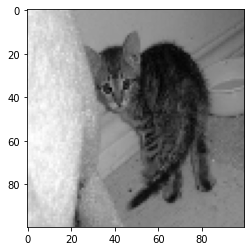

In [83]:
plt.imshow(random.choice(image),cmap='gray')

In [84]:
df.head(10)

,filename,image,category
0,cat.0.jpg,"[[168, 174, 177, 181, 185, 188, 190, 193, 196,...",cat
1,cat.1.jpg,"[[43, 44, 43, 42, 52, 34, 51, 40, 39, 63, 38, ...",cat
2,cat.10.jpg,"[[39, 25, 43, 49, 47, 57, 58, 54, 53, 59, 47, ...",cat
3,cat.100.jpg,"[[221, 224, 222, 228, 229, 224, 224, 235, 229,...",cat
4,cat.1000.jpg,"[[115, 119, 122, 91, 83, 95, 132, 131, 149, 18...",cat
5,cat.10000.jpg,"[[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,...",cat
6,cat.10001.jpg,"[[119, 117, 112, 117, 115, 119, 109, 103, 98, ...",cat
7,cat.10002.jpg,"[[57, 64, 64, 60, 62, 63, 60, 63, 61, 63, 61, ...",cat
8,cat.10003.jpg,"[[239, 241, 243, 239, 242, 243, 250, 251, 253,...",cat
9,cat.10004.jpg,"[[78, 79, 74, 82, 71, 70, 75, 70, 66, 69, 67, ...",cat


In [85]:
df.tail(10)

,filename,image,category
24990,dog.9990.jpg,"[[216, 193, 184, 139, 177, 189, 158, 168, 163,...",dog
24991,dog.9991.jpg,"[[33, 40, 48, 24, 26, 26, 28, 32, 28, 48, 100,...",dog
24992,dog.9992.jpg,"[[33, 39, 50, 34, 45, 42, 41, 64, 55, 55, 57, ...",dog
24993,dog.9993.jpg,"[[203, 203, 203, 203, 203, 202, 202, 202, 201,...",dog
24994,dog.9994.jpg,"[[122, 128, 124, 125, 127, 129, 130, 128, 125,...",dog
24995,dog.9995.jpg,"[[140, 143, 142, 145, 146, 147, 148, 149, 148,...",dog
24996,dog.9996.jpg,"[[117, 78, 102, 83, 101, 113, 69, 85, 86, 86, ...",dog
24997,dog.9997.jpg,"[[42, 35, 47, 58, 65, 46, 51, 57, 58, 40, 44, ...",dog
24998,dog.9998.jpg,"[[254, 251, 245, 234, 224, 207, 189, 144, 112,...",dog
24999,dog.9999.jpg,"[[240, 241, 243, 243, 242, 243, 247, 252, 247,...",dog


(array([0, 1]), [Text(0, 0, 'cat'), Text(1, 0, 'dog')])

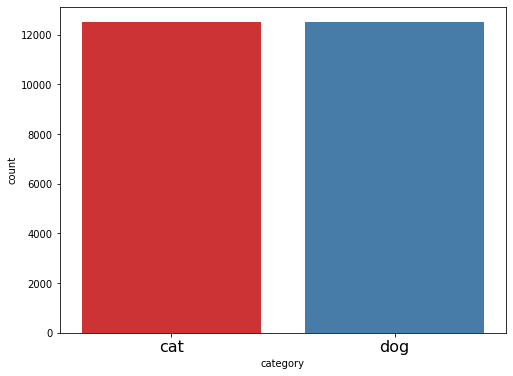

In [86]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="category",palette="Set1")
plt.xticks(fontsize=16)

In [92]:
from sklearn.model_selection import train_test_split
X=df['image']
y=df['category']

# x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
# x_test
X = np.array(X).reshape(-1, 100,100,1)
X

ValueError: cannot reshape array of size 25000 into shape (100,100,1)

In [26]:
dim = (250, 250)
def resize_image(path):
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    image=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return cv2.resize(image, dim, interpolation = cv2.INTER_CUBIC)

In [27]:
resize_image(example).shape

(250, 250)

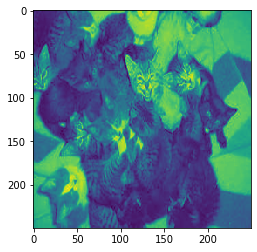

In [28]:
from matplotlib import pyplot as plt

data=resize_image(example)
plt.imshow(data, interpolation='nearest')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X=

In [135]:
hist = np.histogram(X[80].flatten(),256,[0,256])[0]

In [137]:
image = cv2.imread (example)

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [142]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators = 25, max_depth = 12))
])
pipe_rf.fit(x_train, y_train)
rfpred = pipe_rf.predict(x_test)

ValueError: setting an array element with a sequence.

In [90]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure(figsize=(8,5))
plt.plot(cumsum, linewidth=1)
plt.axis([0, 300, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate(d, xy=(187, 0.85), xytext=(150, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=20)
plt.grid(True)

plt.show()

ValueError: setting an array element with a sequence.

In [80]:
df['filename'][2]

'cat.10.jpg'

In [143]:
from cv2 import PCACompute

In [146]:
vec = image.reshape(250 * 250)

    # stack them up to form the matrix
try:
    in_matrix = np.vstack((in_matrix, vec))
except:
    in_matrix = vec

# PCA 
if in_matrix is not None:
    mean, eigenvectors = cv2.PCACompute(in_matrix, np.mean(in_matrix, axis=0).reshape(1,-1))  

ValueError: cannot reshape array of size 496500 into shape (62500,)